 Name Muhammad Ahmad Father Name Muhammad Bashir

# Final project of Data Science Program offered by Jawan Pakistan 

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances


In [3]:
df=pd.read_csv('heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.target.value_counts().index

Int64Index([1, 0], dtype='int64')

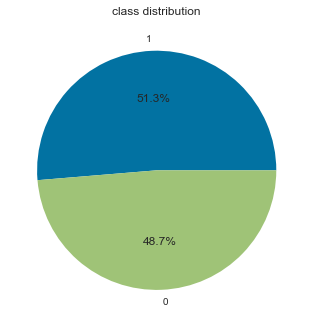

In [5]:
plt.pie(df.target.value_counts().values , labels=df.target.value_counts().index,autopct='%1.1f%%')
plt.title('class distribution' , loc='center')
plt.show()

In [6]:
print ('*'*10,'Dataset Information','*'*10)
print(df.info())

********** Dataset Information **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


## create a function to plot categorical Data 

In [7]:
def cat_feature_plot(f_name):

 feature_value=df[f_name].value_counts().values
 feature_index=df[f_name].value_counts().index

 plt.figure(figsize=(15,5))
 plt.style.use('seaborn-dark-palette')
 plt.suptitle('*'*10+'distribution of categorical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')
##### pie chart ####
 plt.subplot(1,2,1)
 plt.pie(feature_value , labels=feature_index,autopct='%1.1f%%')
 plt.title('pie chart')


###### bar plot  ####
 plt.subplot(1,2,2)
 plt.bar(x=feature_index,height=feature_value,color=['blue','green','red','pink','yellow'])
 plt.xticks(feature_index)
 plt.title('bar chart')
 

[None, None, None, None, None, None, None, None]

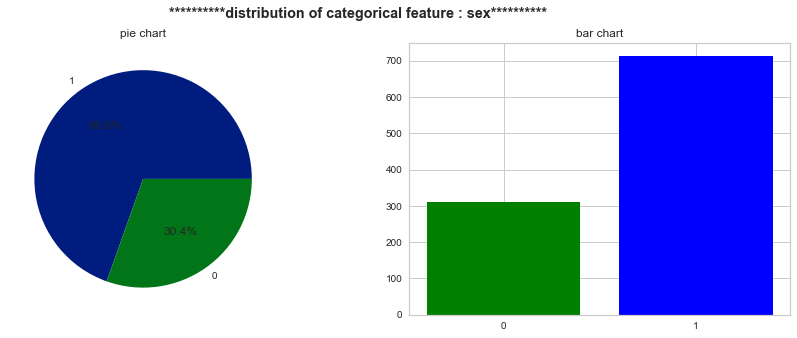

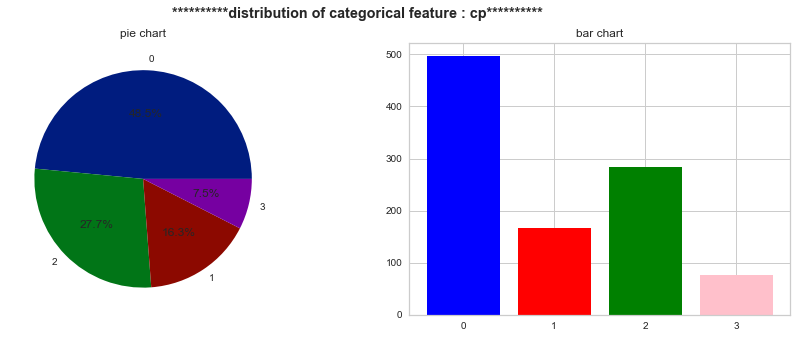

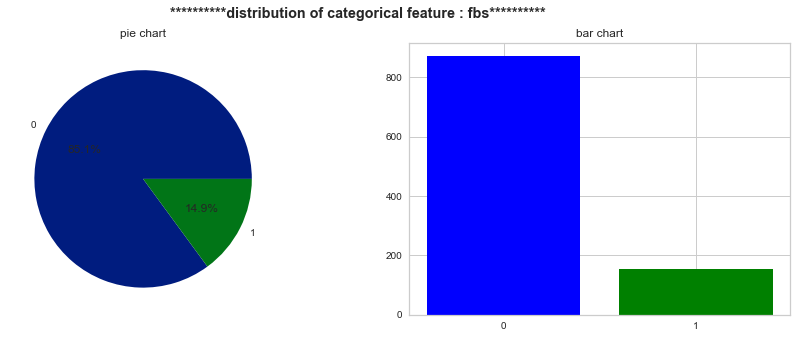

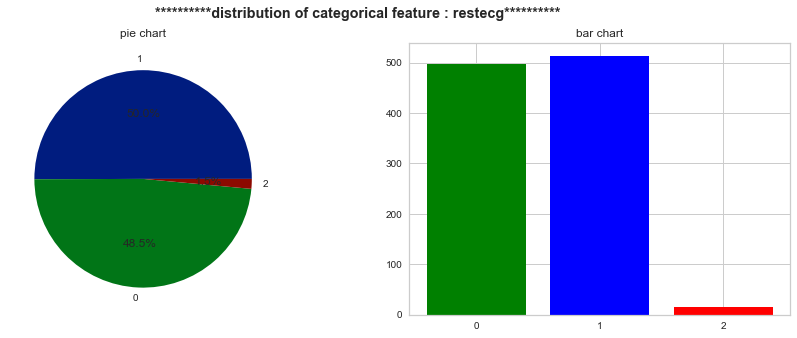

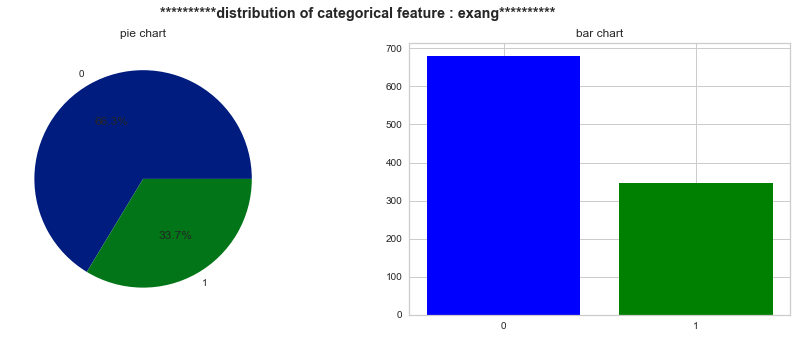

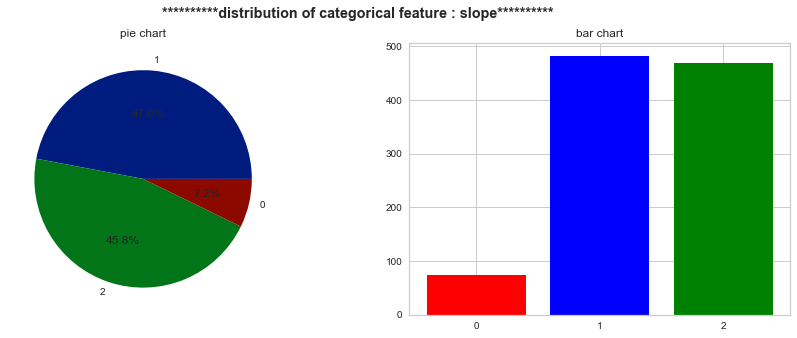

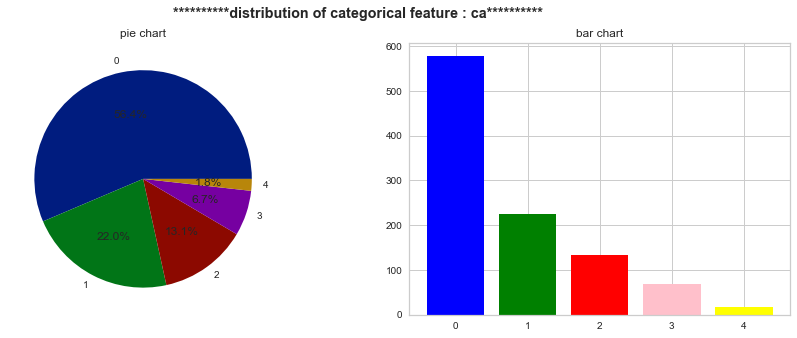

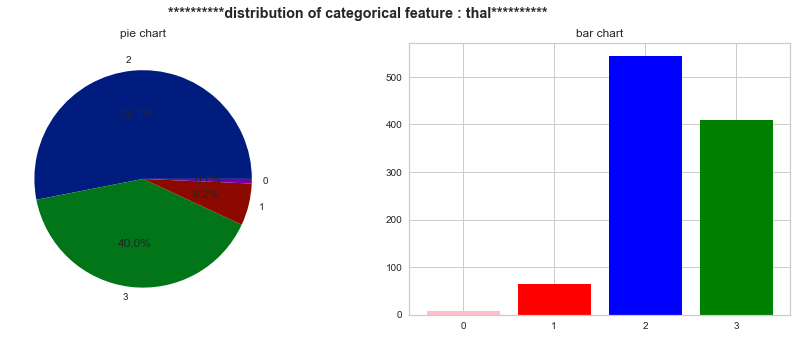

In [8]:
cat_features=['sex','cp','fbs','restecg','exang','slope' ,'ca','thal' ]
list(map(cat_feature_plot,cat_features))

In [16]:
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [17]:
def plot_numerical_dist(f_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('*'*10+'distribution of numerical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=f_name , kde=True )
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=df , x=f_name,linewidth=1.5)
    
    

[None, None, None, None, None]

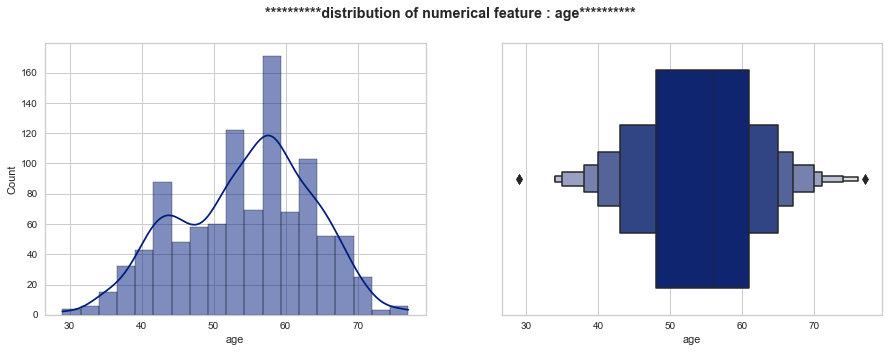

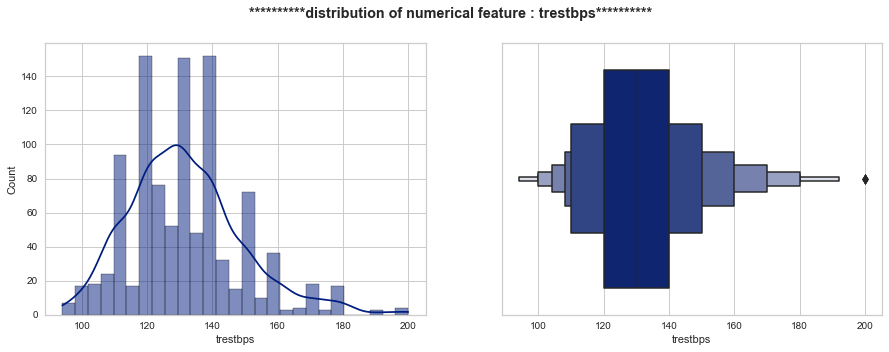

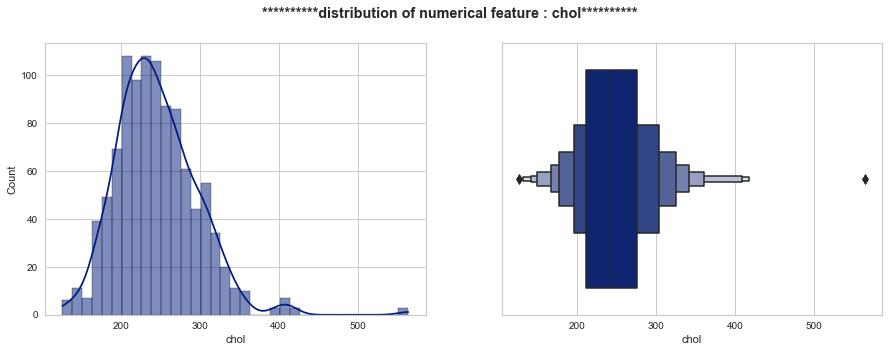

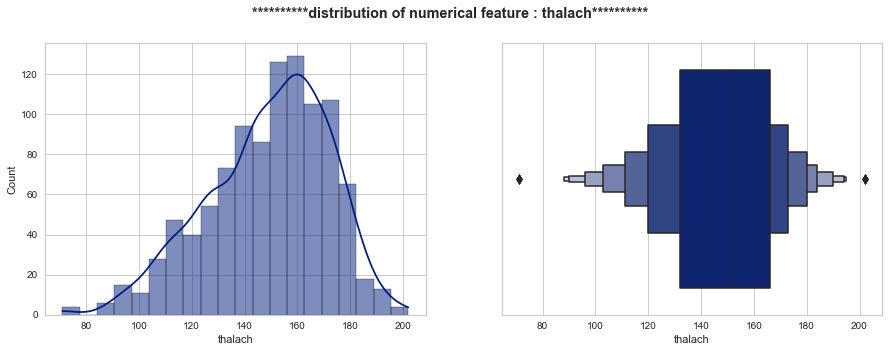

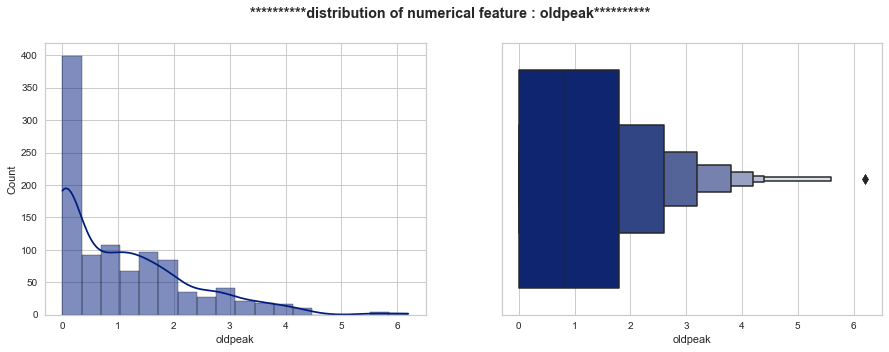

In [18]:
list(map(plot_numerical_dist,numerical_features))

##  distribution of categorical values in relation to target 

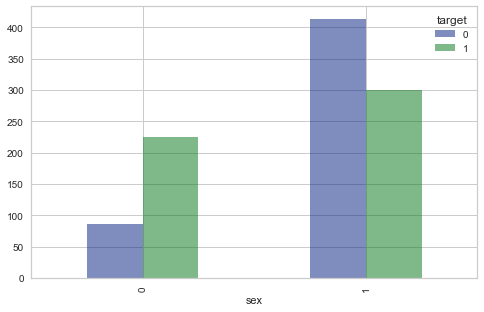

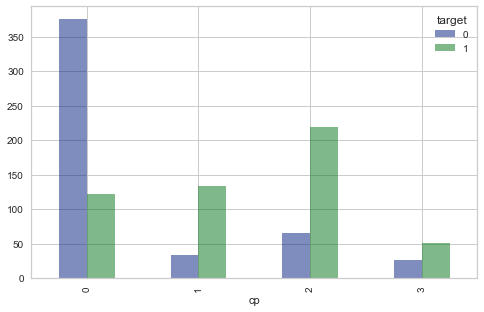

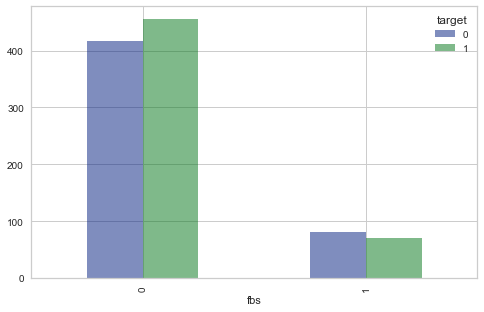

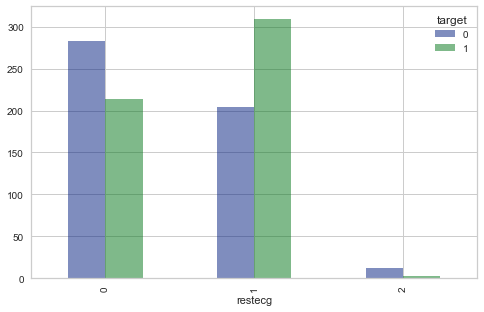

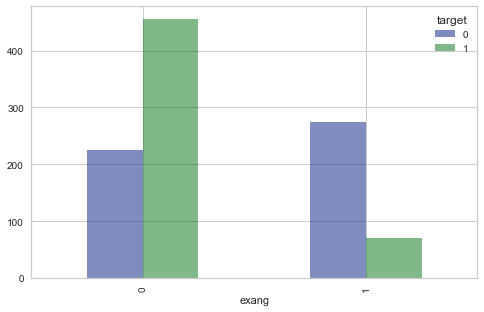

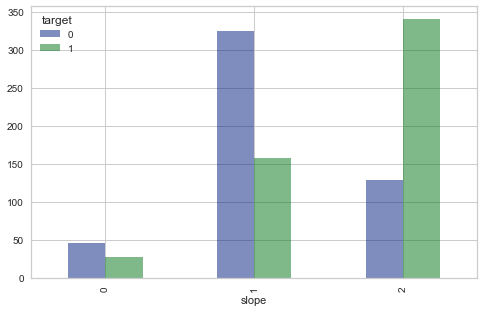

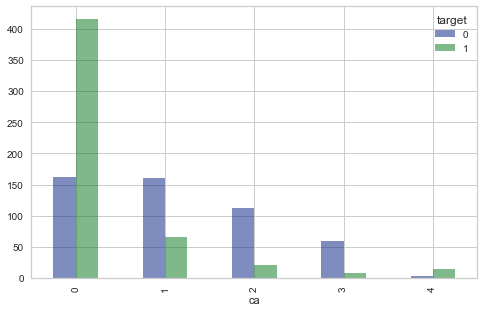

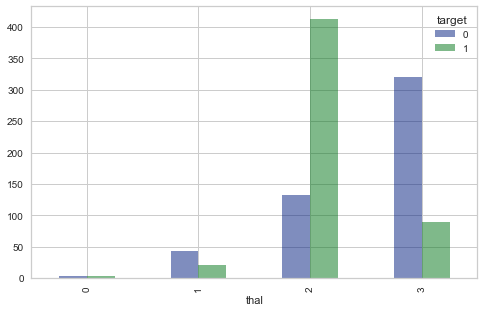

In [19]:
for col in cat_features :
 pd.crosstab(df[col], df.target).plot(kind='bar', figsize=(8, 5), alpha=0.50)

In [20]:
numericalToTarget=numerical_features.append('target')

##  correlation of numerical variables to show correlationvalues for each features with others

<AxesSubplot:>

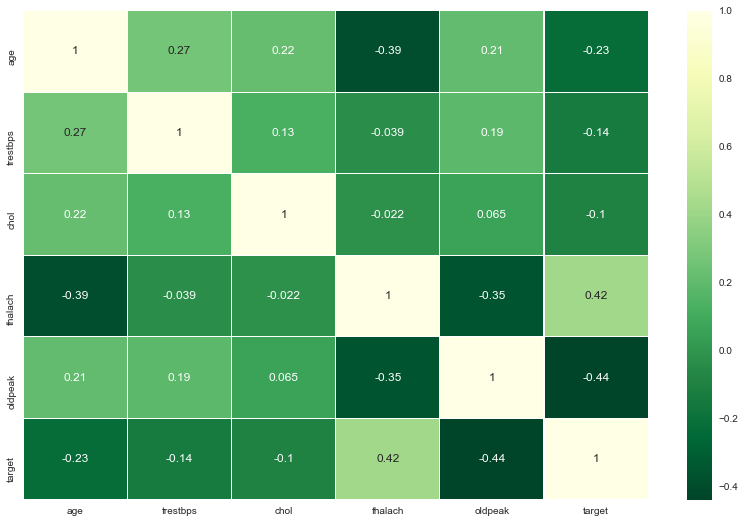

In [21]:
plt.figure(figsize=(14, 9))
sns.heatmap(df[numerical_features].corr(), annot=True,cmap='YlGn_r', linewidths=0.1)

##  data preprocessing 


 we should code the categorical data 

In [22]:
cp = pd.get_dummies(df['cp'], prefix='cp')
restecg = pd.get_dummies(df['restecg'], prefix='restecg')
slope = pd.get_dummies(df['slope'], prefix='slope')
ca = pd.get_dummies(df['ca'], prefix='ca')
thal = pd.get_dummies(df['thal'], prefix='thal')

In [23]:
df.drop(columns=['cp','restecg', 'thal','ca', 'slope'] , inplace=True)
frames = [df, cp,restecg, thal,ca, slope]
df = pd.concat(frames, axis = 1)

In [24]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2
0,52,1,125,212,0,168,0,1.0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,0,1,1,0,0,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,1,...,0,1,1,0,0,0,0,1,0,0
3,61,1,148,203,0,161,0,0.0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,...,1,0,0,0,0,1,0,0,1,0


In [25]:
X=df.drop(columns='target')
y=df['target']

##  data normalizing


In [26]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [28]:
 def plot_LearningCurv(model):
    loglc = LearningCurve(model,  title='Logistic Regression Learning Curve')
    loglc.fit(X_train, y_train)
    loglc.finalize() 

In [29]:
def plot_RoC(model):
 logrocauc = ROCAUC(model, classes=['False', 'True'],
 title='Logistic Regression ROC AUC Plot')
 logrocauc.fit(X_train, y_train)
 logrocauc.score(X_test, y_test)
 logrocauc.finalize()
 plt.show()

#  print('* Train Learning Curve: Learning curve calculated from the training dataset that gives an idea of how well the model is learning.Validation Learning Curve: Learning curve calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.')


##  data spliting

In [30]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True)

##  Logistic Regression

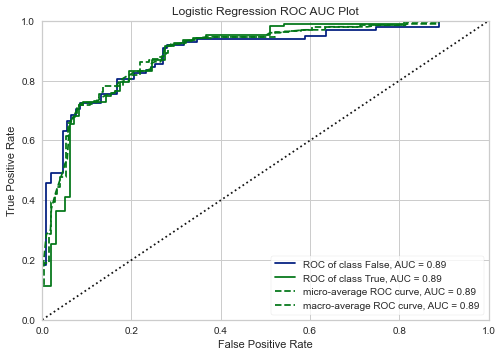

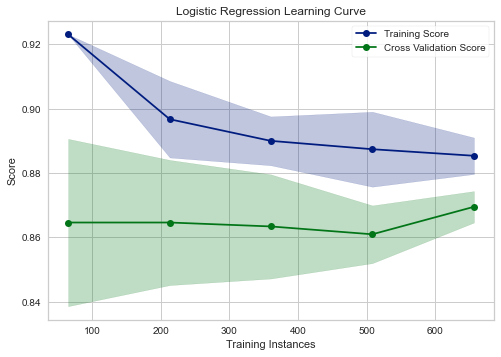

In [31]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
accuracy_score(y_test,y_pred)
plot_RoC(logreg)
plot_LearningCurv(logreg)

##  KNN

.:. K-Nearest Neighbour Accuracy: 85.85% .:.


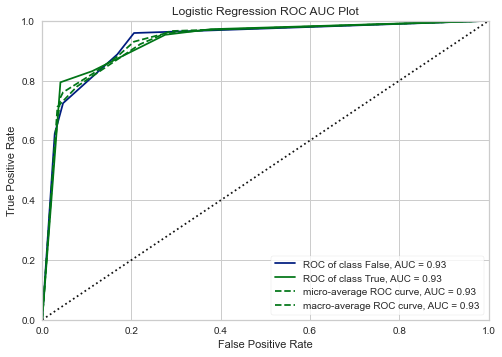

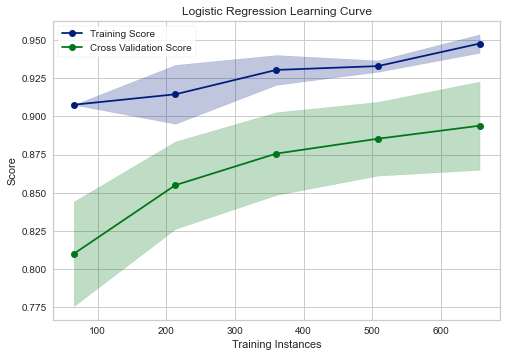

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)
KNNAcc = accuracy_score(y_knn_pred, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')
plot_RoC(knn_model)
plot_LearningCurv(knn_model)

## SVM 

.:. SVM Neighbour Accuracy: 87.80% .:.


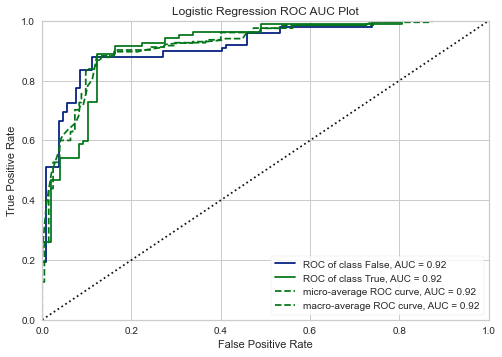

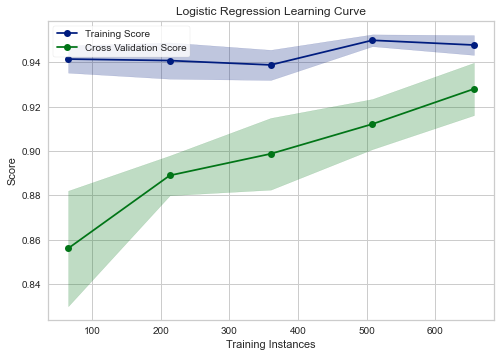

In [33]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)
y_svm_pred=svm_model.predict(X_test)
SVMacc = accuracy_score(y_svm_pred, y_test)
print('.:. SVM Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(SVMacc*100)+' .:.')
plot_RoC(svm_model)
plot_LearningCurv(svm_model)

##  Naive Bays 

.:. NB  Accuracy: 80.5% .:.


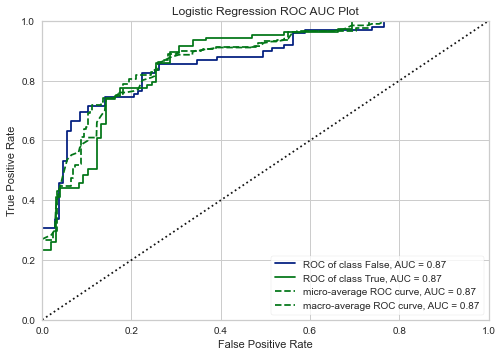

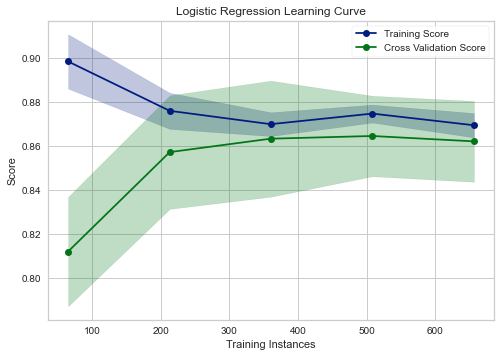

In [34]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB(var_smoothing=0.08)
NB_model.fit(X_train, y_train)
y_pred_NB=NB_model.predict(X_test)
NBacc = accuracy_score(y_pred_NB, y_test)
print('.:. NB  Accuracy:'+'\033[1m {:.1f}%'.format(NBacc*100)+' .:.')
plot_RoC(NB_model)
plot_LearningCurv(NB_model)

## Random Classifier 

.:. RF  Accuracy: 88.8% .:.


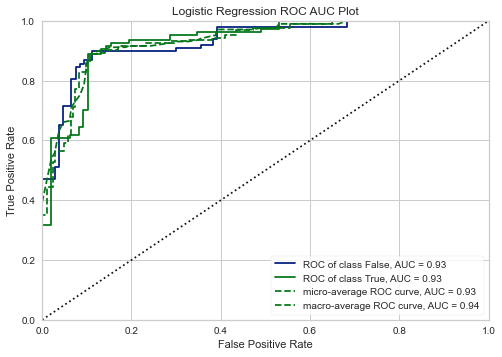

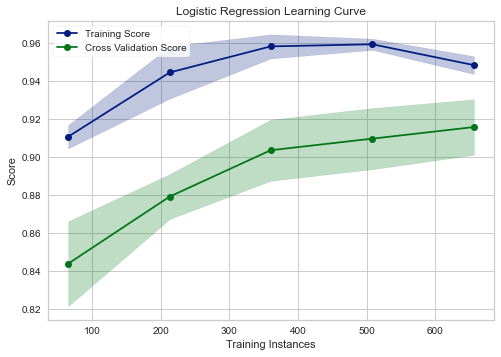

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)
RFacc = accuracy_score(y_pred_RF, y_test)
print('.:. RF  Accuracy:'+'\033[1m {:.1f}%'.format(RFacc*100)+' .:.')
plot_RoC(RF_model)
plot_LearningCurv(RF_model)